In [431]:
#pip install plotly geopandas folium iplot

In [432]:
#1.import the required libraries.

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns
from sklearn import preprocessing
import geopandas as gpd
import iplot as iplot

In [434]:
from plotly import __version__
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [435]:
df = pd.read_csv('../data/AB_NYC_2019.csv.zip')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Exploration

In [436]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [437]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [438]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,48885,48886,48887,48888,48889,48890,48891,48892,48893,48894
id,2539,2595,3647,3831,5022,5099,5121,5178,5203,5238,...,36482809,36483010,36483152,36484087,36484363,36484665,36485057,36485431,36485609,36487245
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm,...,Stunning Bedroom NYC! Walking to Central Park!!,Comfy 1 Bedroom in Midtown East,Garden Jewel Apartment in Williamsburg New York,"Spacious Room w/ Private Rooftop, Central loca...",QUIT PRIVATE HOUSE,Charming one bedroom - newly renovated rowhouse,Affordable room in Bushwick/East Williamsburg,Sunny Studio at Historical Neighborhood,43rd St. Time Square-cozy single bed,Trendy duplex in the very heart of Hell's Kitchen
host_id,2787,2845,4632,4869,7192,7322,7356,8967,7490,7549,...,131529729,274311461,208514239,274321313,107716952,8232441,6570630,23492952,30985759,68119814
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura,Chris,Garon,Shunichi,MaryEllen,Ben,...,Kendall,Scott,Melki,Kat,Michael,Sabrina,Marisol,Ilgar & Aysel,Taz,Christophe
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan,...,Manhattan,Manhattan,Brooklyn,Manhattan,Queens,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown,...,East Harlem,Midtown,Williamsburg,Hell's Kitchen,Jamaica,Bedford-Stuyvesant,Bushwick,Harlem,Hell's Kitchen,Hell's Kitchen
latitude,40.6475,40.7536,40.809,40.6851,40.7985,40.7477,40.6869,40.7649,40.8018,40.7134,...,40.7963,40.7556,40.7123,40.7639,40.6914,40.6785,40.7018,40.8147,40.7575,40.764
longitude,-73.9724,-73.9838,-73.9419,-73.9598,-73.944,-73.975,-73.956,-73.9849,-73.9672,-73.9904,...,-73.936,-73.9672,-73.9422,-73.9918,-73.8084,-73.95,-73.9332,-73.9487,-73.9911,-73.9893
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt,...,Private room,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Private room,Entire home/apt,Shared room,Private room
price,149,225,150,89,80,200,60,79,79,150,...,75,200,170,125,65,70,40,115,55,90


In [439]:
i_missing = np.where(df.isna())[0]

In [440]:
df.iloc[i_missing,:]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


`last_review` and `reviews_per_month` seems to be na for about 20141 rows.  As of now, they dont seem to be required for the analysis.

In [441]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,POINT (-73.97500 40.74767)
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,POINT (-73.95596 40.68688)
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,POINT (-73.98493 40.76489)
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,POINT (-73.96723 40.80178)
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,POINT (-73.99037 40.71344)


In [442]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


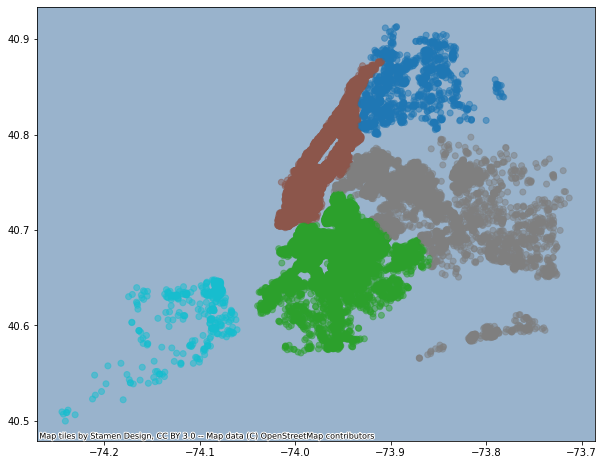

In [443]:
import contextily as cx
ax = gdf.plot(figsize=(10, 10), alpha=0.5,column='neighbourhood_group')
cx.add_basemap(ax)

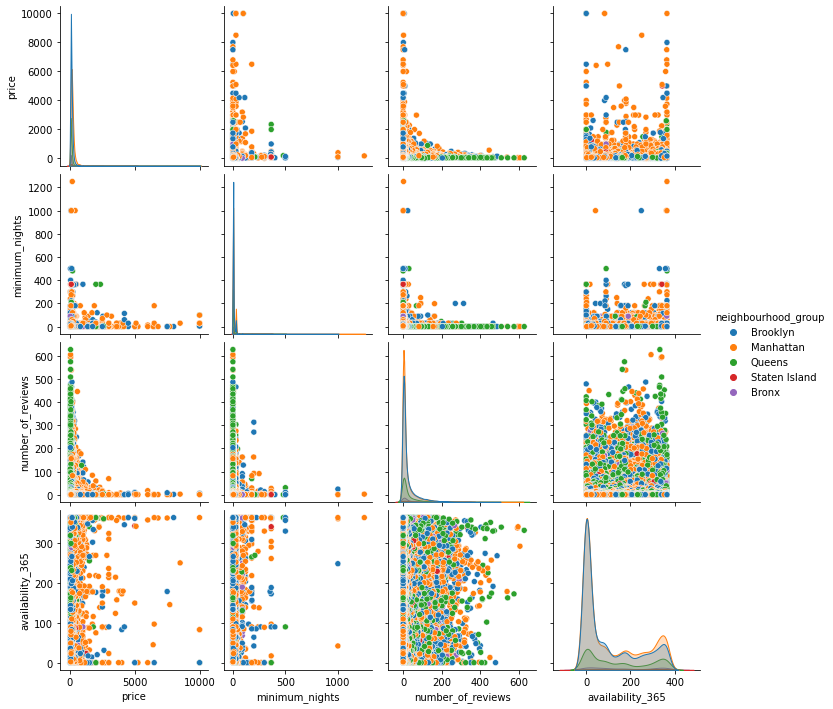

In [444]:
sns.pairplot(df,vars=df[['price','minimum_nights','number_of_reviews','availability_365']],hue="neighbourhood_group")

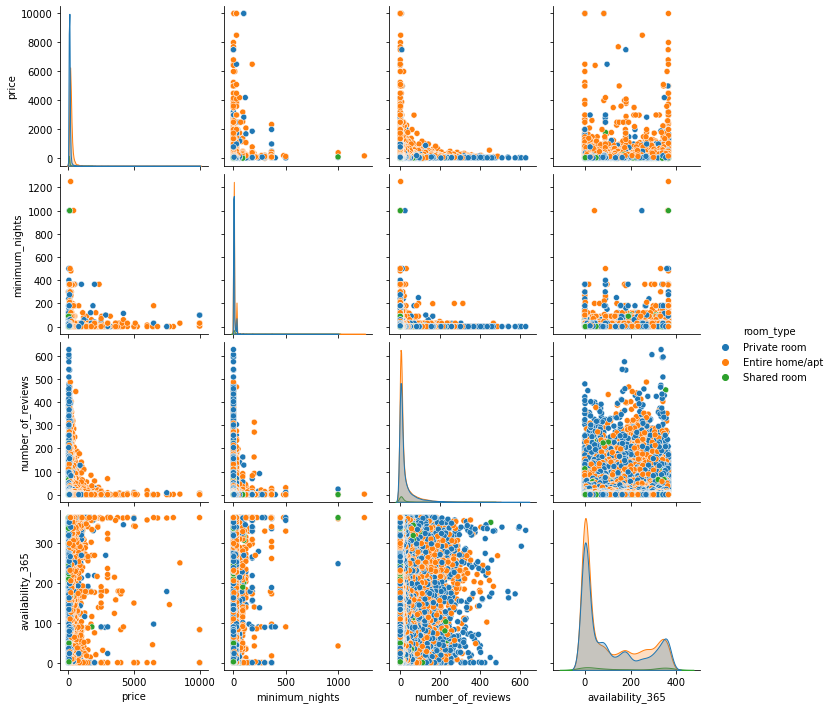

In [445]:
sns.pairplot(df,vars=df[['price','minimum_nights','number_of_reviews','availability_365']],hue="room_type")

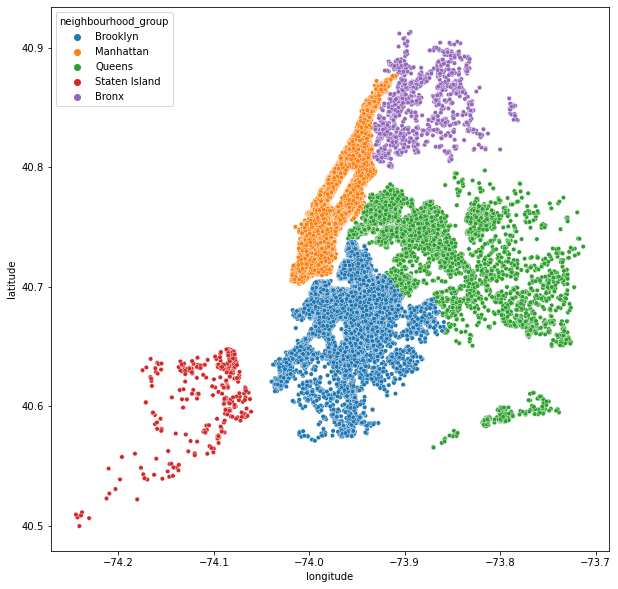

In [446]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=df)
plt.show()
display()

In [447]:
#numeric_vars = df.columns.tolist()[6:8]+df.columns.tolist()[10:]
#df.iloc[[6,7,9,10,11,13,14,15],:]
df_numonly = df.select_dtypes(np.number)
df_numonly.iloc[:,2:]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


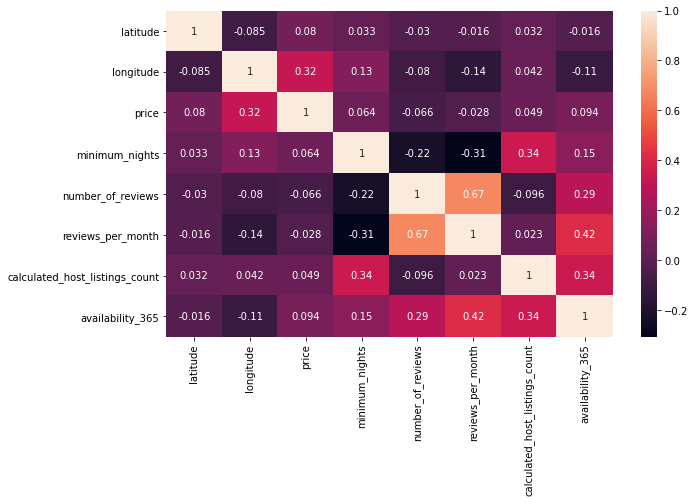

In [448]:
import seaborn as sns
x=df_numonly.iloc[:,2:].apply(lambda x: np.log(np.abs(x+1))).corr(method='pearson')
sns.heatmap(x, annot=True)
plt.show()

In [449]:
df3=df.groupby(['neighbourhood_group']).mean()

In [450]:
df3

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,2.273492e+07,1.056099e+08,40.848305,-73.884552,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937
Brooklyn,1.825685e+07,5.671526e+07,40.685036,-73.951190,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292
Manhattan,1.877494e+07,6.783062e+07,40.765062,-73.974607,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410
Queens,2.175500e+07,9.615680e+07,40.731531,-73.872775,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818
Staten Island,2.159747e+07,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284


In [451]:
df3.drop(['latitude', 'longitude','host_id','id'],axis=1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,
Bronx,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937
Brooklyn,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292
Manhattan,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410
Queens,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818
Staten Island,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284


In [452]:
#To learn about different hosts and areas, we will try to find visualize the data into graphs and charts that are easy to understand.

#check the host with the highest amount of rooms
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

The host with the highest amount of listings has over 327 rooms within New York alone!

Text(0.5, 1.0, 'Number and types of listings for each neighbourhood_group')

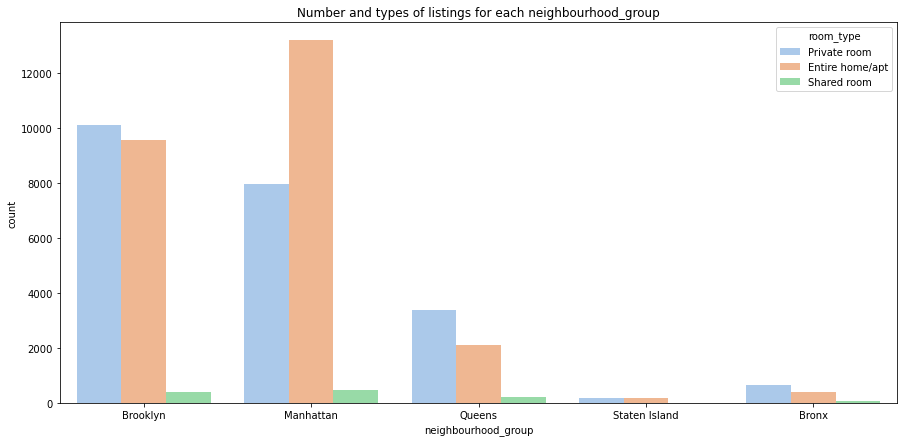

In [453]:
#counting the amount of listings per neighbourhood group
plt.figure(figsize=(15,7))
viz_1 = sns.countplot(x='neighbourhood_group', hue = 'room_type', data = df, palette = 'pastel')
viz_1.set_title('Number and types of listings for each neighbourhood_group')

##### From the above bar graph we can infer that most listings are located in either Brooklyn or Manhattan and the most available types of rooms are private rooms or apartment rooms.

##### due to extremities in this dataset, we will be cutting those values off from this visualization
###### creating a sub-dataframe with no extreme values / less than 500

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

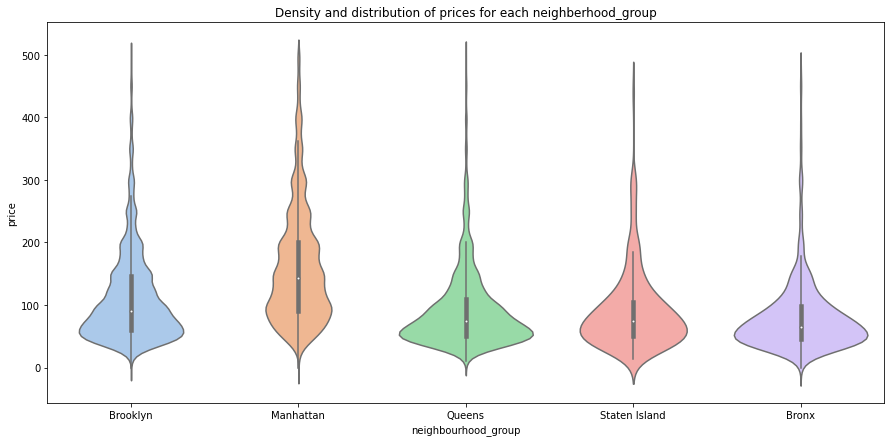

In [454]:
sub_1 = df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
plt.figure(figsize = (15,7))
viz_2 = sns.violinplot(data = sub_1, x = 'neighbourhood_group', y = 'price', palette = 'pastel')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In [455]:
display()

In [456]:
#From the above violin plot we can infer that Manhattan, on average, has the highest price for its listings in Airbnb. Followed by Brooklyn, Queens, Staten Island, and Bronx respectively. This is no surprise due to the common knowledge that Manhattan is one of the most expensive cities to live in. Furthermore, Manhattan has the highest variations in its price.

Text(0.5, 1.0, 'Density and distribution of availability for each neighberhood_group')

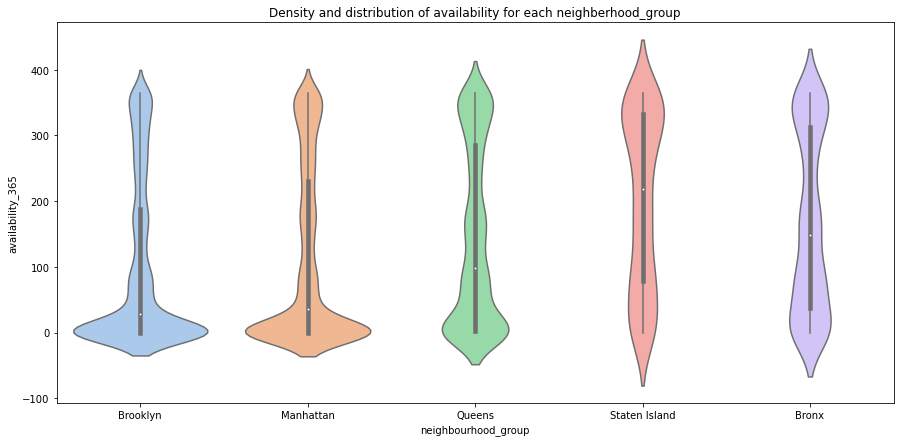

In [457]:
#Now, we move on to see if neighbourhood groups affect how well each listing is booked, or its availability.
#using violinplot to showcase density and distribtuion of availability

plt.figure(figsize = (15,7))
viz_3 = sns.violinplot(data = df, x = 'neighbourhood_group', y = 'availability_365', palette = 'pastel')
viz_3.set_title('Density and distribution of availability for each neighberhood_group')

In [458]:
#From the aove graph we can induce that the busiest postings are in Brooklyn and Manhattan, with the violin shape growing at the base. This shows the airbnb posting has an accessibility for appointments for zero days out of 365, in this manner it is constantly reserved. Sovereigns likewise had accomplishment with postings, however not as much as the two neighborhood bunches in advance. Each of the five violins demonstrated a slanted example to either the top or the base, implying that either the rooms sold quite well or wasn't reserved by any stretch of the imagination. This is extremely intriguing in light of the fact that this shows there is an obstacle for each inclining to survive, another posting will think that its difficult to be reserved because of absence of audits or the posting lost all sense of direction in Airbnb's suggestion framework. Another posting once in a while gets prescribed to clients. In any case, when the posting discovers achievement and additions audits and is highlighted via Airbnb's application, the posting will be reserved and sold out like flapjacks.

In [459]:
#Now let's move on to see how the top hosts keep their listings busy.

#let's make a list of the top 5 hosts
top_five_host=df.host_id.value_counts().head(5)
top_five_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64

In [460]:
#create a dataframe that only contains listings from the top hosts
airbnb_top_host = df.loc[df.host_id.isin([219517861, 107434423, 30283594, 137358866, 12243051])]
airbnb_top_host.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,169,30,3,2018-12-07,0.09,121,364,POINT (-74.01408 40.70862)
10075,7730160,Furnished NYC 1BR apt near Rockefeller Center!!!,30283594,Kara,Manhattan,Theater District,40.75967,-73.98573,Entire home/apt,135,30,0,NaN,NaN,121,174,POINT (-73.98573 40.75967)
10335,7913426,LUX 1-Bedroom NYC Apartment Near Times Square!,30283594,Kara,Manhattan,Theater District,40.75654,-73.98891,Entire home/apt,369,30,0,NaN,NaN,121,364,POINT (-73.98891 40.75654)
10398,7966358,NYC High End 2BR Midtown West Apt,30283594,Kara,Manhattan,Midtown,40.76633,-73.98145,Entire home/apt,335,30,0,NaN,NaN,121,201,POINT (-73.98145 40.76633)
10490,8045421,NYC Chelsea Luxury 1BR Apt,30283594,Kara,Manhattan,Chelsea,40.74465,-73.99253,Entire home/apt,129,30,3,2017-12-31,0.07,121,161,POINT (-73.99253 40.74465)


<Figure size 1080x504 with 0 Axes>

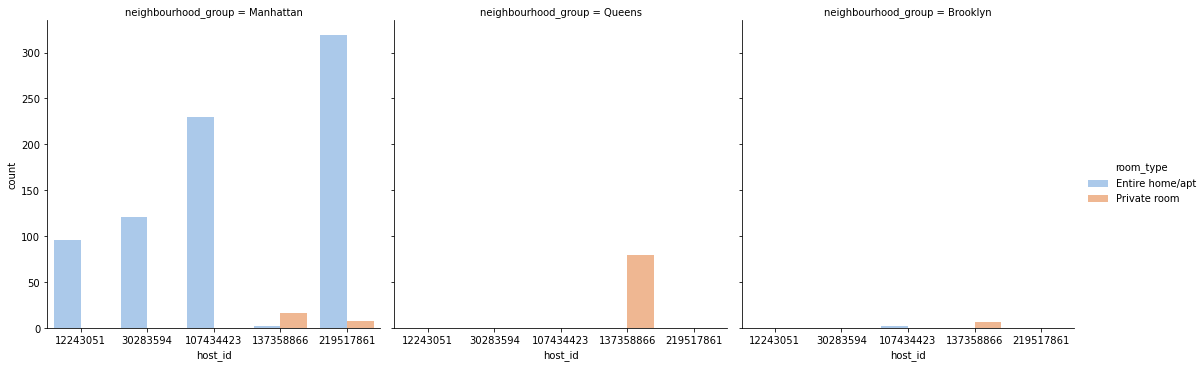

In [461]:
##visualization of top hosts' listings' location and room type
plt.figure(figsize = (15,7))
viz_4 = sns.catplot(x = 'host_id', hue = 'room_type',col='neighbourhood_group',
                    data = airbnb_top_host, palette = 'pastel', kind = 'count')

In [462]:
#From this catplot, we can infer that the top hosts mostly, if not some, has all their listings in Manhattan. These top hosts owns mostly listings with the room type 'entire home/apt', with an exception of the second host with the most listings mainly listing private rooms.

Text(0.5, 1.0, 'Density and distribution of availability for each neighberhood_group')

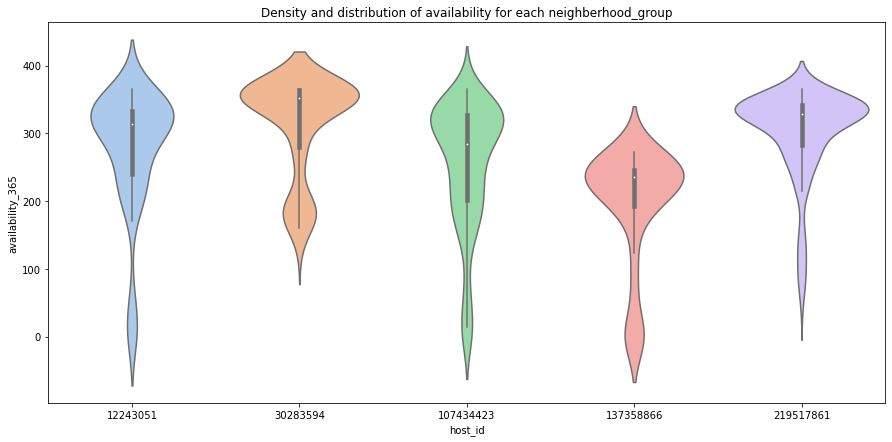

In [463]:
#using violinplot to showcase density and distribtuion of availability

plt.figure(figsize = (15,7))
viz_5 = sns.violinplot(data = airbnb_top_host, x = 'host_id', y = 'availability_365', palette = 'pastel')
viz_5.set_title('Density and distribution of availability for each neighberhood_group')

In [464]:
#interestingly, on average, host_id '13758866', received more frequent bookings than the other. This host mainly lists room type that are private, so the type of room might be a factor leading to higher amount of bookings.

In [465]:
df4=df.groupby(['neighbourhood_group','neighbourhood']).mean()

In [466]:
r1=df4.loc['Bronx'].number_of_reviews.sum().round()
r2=df4.loc['Brooklyn'].number_of_reviews.sum().round()
r3=df4.loc['Manhattan'].number_of_reviews.sum().round()
r4=df4.loc['Queens'].number_of_reviews.sum().round()
r5=df4.loc['Staten Island'].number_of_reviews.sum().round()

In [467]:
abcd=df['neighbourhood_group'].value_counts()
dfabcd=pd.DataFrame(abcd)
dfabcd.reset_index(inplace=True)

In [468]:
reviews = [r1,r2,r3,r4,r5]
review = pd.DataFrame(data=reviews,index=dfabcd['index'],columns=['values'],)
review.reset_index(inplace=True)



trace10 = go.Bar(x=review['index'],y=review['values'],marker=dict(color=['Blue','Red','Green','Black','Purple']),width=0.4)

data=[trace10]
layout = go.Layout(title='Number of reviews by Neighbourhood',height=400,width=800)
fig= go.Figure(data=data,layout=layout)
display()
fig.show()

In [469]:
r1=df4.loc['Bronx'].reviews_per_month.mean()
r2=df4.loc['Brooklyn'].reviews_per_month.mean()
r3=df4.loc['Manhattan'].reviews_per_month.mean()
r4=df4.loc['Queens'].reviews_per_month.mean()
r5=df4.loc['Staten Island'].reviews_per_month.mean()

rev = [r1,r2,r3,r4,r5]

rev_per_month = pd.DataFrame(data=rev,columns=['values'],index=dfabcd['index'])

rev_per_month.reset_index(inplace=True)


trace2 = go.Scatter(x=rev_per_month['index'],y=rev_per_month['values'],marker=dict(color=['Blue','Red','Green','Black','Purple']))
data=[trace2]
layout = go.Layout(title='Average Reviews per month per place by Neighbourhood',height=400,width=800)
fig= go.Figure(data=data,layout=layout,)
display()
fig.show()

In [470]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [471]:
df5 = df.groupby(['neighbourhood_group','room_type']).mean()

In [472]:
room_types_neighbourhoods=df5.drop(['id','host_id','latitude','longitude','number_of_reviews','reviews_per_month'],axis=1)

In [473]:
room_types_neighbourhoods

price  minimum_nights  \
neighbourhood_group room_type                                     
Bronx               Entire home/apt  127.506596        5.957784   
                    Private room      66.788344        3.858896   
                    Shared room       59.800000        3.366667   
Brooklyn            Entire home/apt  178.327545        6.531332   
                    Private room      76.500099        5.539479   
                    Shared room       50.527845        7.753027   
Manhattan           Entire home/apt  249.239109       10.539283   
                    Private room     116.776622        5.446880   
                    Shared room       88.977083        6.766667   
Queens              Entire home/apt  147.050573        5.369752   
                    Private room      71.762456        5.120107   
                    Shared room       69.020202        4.232323   
Staten Island       Entire home/apt  173.846591        6.238636   
                    Private room      62.292553        3.632979   
                    Shared room       57.444444        2.333333   

                                     calculated_host_listings_count  \
neighbourhood_group room_type                                         
Bronx               Entire home/apt                        1.865435   
                    Private room                           2.338957   
                    Shared room                            3.416667   
Brooklyn            Entire home/apt                        1.837849   
                    Private room                           2.547177   
                    Shared room                            6.171913   
Manhattan           Entire home/apt                       18.922721   
                    Private room                           3.188048   
                    Shared room                            3.885417   
Queens              Entire home/apt                        1.677958   
                    Private room                           5.559905   
                    Shared room                            3.737374   
Staten Island       Entire home/apt                        1.596591   
                    Private room                           2.840426   
                    Shared room                            5.555556   

                                     availability_365  
neighbourhood_group room_type                          
Bronx               Entire home/apt        158.000000  
                    Private room           171.331288  
                    Shared room            154.216667  
Brooklyn            Entire home/apt         97.205147  
                    Private room            99.917983  
                    Shared room            178.007264  
Manhattan           Entire home/apt        117.140996  
                    Private room           101.845026  
                    Shared room            138.572917  
Queens              Entire home/apt        132.267176  
                    Private room           149.222716  
                    Shared room            192.186869  
Staten Island       Entire home/apt        178.073864  
                    Private room           226.361702  
                    Shared room             64.777778

In [474]:
#pip install scatter

In [475]:
room_types_neighbourhoods.describe()

,price,minimum_nights,calculated_host_listings_count,availability_365
count,15.000000,15.000000,15.000000,15.000000
mean,106.390671,5.512476,4.342800,143.941826
std,58.144083,2.007521,4.294438,42.738620
min,50.527845,2.333333,1.596591,64.777778
25%,64.540448,4.045609,2.102196,109.493011
50%,76.500099,5.446880,3.188048,149.222716
75%,137.278584,6.384984,4.720486,174.669276
max,249.239109,10.539283,18.922721,226.361702


In [476]:
fig = px.scatter_matrix(room_types_neighbourhoods,dimensions=["price","calculated_host_listings_count","availability_365"],color="minimum_nights")
#height=1000,width=900
#fig.update_traces(diagonal_visible=False)
#display()
fig.show()

In [477]:

df6 = df.groupby(['room_type']).mean()
room_types =df6.drop(['id','host_id','latitude','longitude','number_of_reviews','reviews_per_month'],axis=1)

In [478]:
room_types

,price,minimum_nights,calculated_host_listings_count,availability_365
room_type,,,,
Entire home/apt,211.794246,8.506907,10.698335,111.920304
Private room,89.780973,5.377900,3.227717,111.203933
Shared room,70.127586,6.475000,4.662931,162.000862


In [479]:
df7 = df.groupby(['neighbourhood_group','room_type'])['id'].agg('count')

In [480]:
df7

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: id, dtype: int64

In [481]:
rmtng = pd.DataFrame(df7)

In [482]:
rmtng

id
neighbourhood_group room_type             
Bronx               Entire home/apt    379
                    Private room       652
                    Shared room         60
Brooklyn            Entire home/apt   9559
                    Private room     10132
                    Shared room        413
Manhattan           Entire home/apt  13199
                    Private room      7982
                    Shared room        480
Queens              Entire home/apt   2096
                    Private room      3372
                    Shared room        198
Staten Island       Entire home/apt    176
                    Private room       188
                    Shared room          9

In [483]:
rmtng.reset_index(inplace=True)

In [484]:
rmtng

,neighbourhood_group,room_type,id
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


In [485]:
Bronx = rmtng[rmtng['neighbourhood_group']=='Bronx']
Brooklyn = rmtng[rmtng['neighbourhood_group']=='Brooklyn']
Manhattan = rmtng[rmtng['neighbourhood_group']=='Manhattan']
Queens = rmtng[rmtng['neighbourhood_group']=='Queens']
StatenIsland = rmtng[rmtng['neighbourhood_group']=='Staten Island']

df8 = df.groupby(['room_type']).count()
rooms = df8.drop(['host_name','name','host_id','latitude','longitude','number_of_reviews','reviews_per_month','neighbourhood_group','neighbourhood','price','minimum_nights','calculated_host_listings_count','availability_365','last_review'],axis=1)
rooms.reset_index(inplace=True)

In [486]:
rooms

,room_type,id,geometry
0,Entire home/apt,25409,25409
1,Private room,22326,22326
2,Shared room,1160,1160


In [487]:
pip install iplot

Note: you may need to restart the kernel to use updated packages.


In [488]:
#Preprocessing and preparing Data for prediction
df = pd.read_csv('../data/AB_NYC_2019.csv.zip')
df1 = df

#Attributes not relevant for modeling
df1.drop(['name','id','host_name','last_review'],axis=1,inplace=True)


df1['reviews_per_month']=df1['reviews_per_month'].replace(np.nan, 0)

le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood_group'])    
df1['neighbourhood_group']=le.transform(df1['neighbourhood_group'])

le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood'])
df1['neighbourhood']=le.transform(df1['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df1['room_type'])
df1['room_type']=le.transform(df1['room_type'])

df1.sort_values(by='price',ascending=True,inplace=True)

df1.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
25634,15787004,1,28,40.69467,-73.92433,1,0,2,16,0.71,5,0
25433,131697576,0,62,40.83296,-73.88668,1,0,2,55,2.56,4,127
25753,1641537,1,91,40.72462,-73.94072,1,0,2,12,0.53,2,0
23161,8993084,1,13,40.69023,-73.95428,1,0,4,1,0.05,4,28


## summary of data visualisation:
##### For this dataset, the differences between many variables within the dataframe are relatively low.Nevertheless, we may extract information from these details with polishing and visualization.Next, in each neighborhood group we researched the numbers and room styles for airbnb listings.We found that most of the listings were private rooms and whole homes frequently in the Manhattan and Brooklyn neighbourhood.We also investigated cost structure in each area and uncovered the facts that Manhattan is expensive to live in.
##### Instead we continued with the most listings to explore hosts,From the graph, almost all the top airbnb hosts listed whole homes / apt in Manhattan.Nonetheless, distributions for top hosts-owned listings also shows, in comparison to my assumption, that top hosts also had a handful of listings for over 300 days, which suggests they are not booked that much.Ironically, it is comparatively more difficult to book the top host with a number of private residences.

####### After understanding the data and visualising, we found out the correlations. MAchine Learning algrithms are used to predict.

In [489]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [490]:
#df1 = pd.DataFrame(np.log2(df1))
df1 = df1.apply(lambda x: np.log(np.abs(x+1)))

In [491]:
df1.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,18.273654,0.693147,2.639057,3.730083,4.289265,0.693147,0.0,0.693147,4.564348,1.677097,1.945910,5.407172
25634,16.574698,0.693147,3.367296,3.730373,4.289422,0.693147,0.0,1.098612,2.833213,0.536493,1.791759,0.000000
25433,18.696019,0.000000,4.143135,3.733685,4.288906,0.693147,0.0,1.098612,4.025352,1.269761,1.609438,4.852030
25753,14.311144,0.693147,4.521789,3.731091,4.289647,0.693147,0.0,1.098612,2.564949,0.425268,1.098612,0.000000
23161,16.011967,0.693147,2.639057,3.730267,4.289833,0.693147,0.0,1.609438,0.693147,0.048790,1.609438,3.367296


In [492]:
#Linear Regression Model
lm = LinearRegression()

In [493]:
X = df1[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df1['price']

In [494]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
lm.fit(X_train,y_train)


LinearRegression()

In [495]:
predicts = lm.predict(X_test)

Text(0, 0.5, 'predicted')

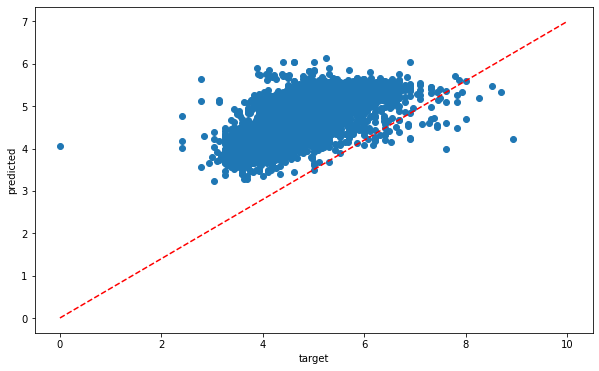

In [496]:
plt.clf()
plt.scatter(y_test,predicts)
# dashed diagonal line
plt.plot([0,10], [0, 7], 'r--')
# x and y axis range
#plt.xlim([2.5, 8.5])
#plt.ylim([2.5, 8.5])
# x and y labels
plt.xlabel("target")
plt.ylabel("predicted")

In [497]:
lm.intercept_

-1232.9698489376333

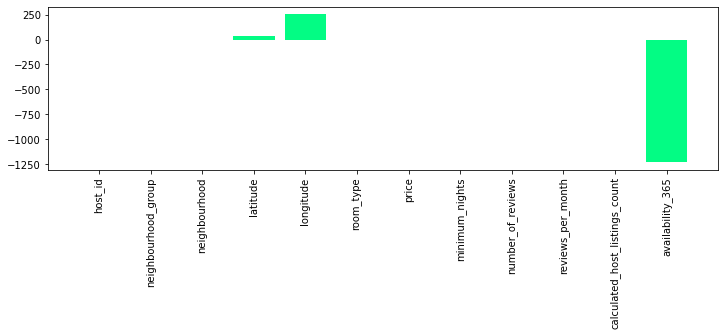

In [498]:
# print the value text over the bar
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='blue')

def show_weights(model, names):
    # combine both the coefficients and intercept to present
    w = np.append(model.coef_, model.intercept_)


    plt.figure(figsize=(12,3))
    
    # TODO: create bar chart to present the w
    plt.bar(names,w,color='#03fc84')
    
    ax = plt.gca()
    ax.set_xticks(range(len(w)))
    ax.set_xticklabels(names, rotation = 90)
#     # manual positioning the label text - replaced with autolabel     
#     for i, v in enumerate(w):
#         ax.text(i - 0.25, v*1.05, "{:.2f}".format(v), color='red')

show_weights(lm, df1.columns.values)

In [499]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [500]:
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,predicts))

Root mean squared error is:


0.4938971288212236

In [501]:
print('r2 score is:')
r2 = r2_score(y_test,predicts)
r2*100

r2 score is:


48.20564730618253

In [502]:
print("Mean absolute error is:")
mean_absolute_error(y_test,predicts)

Mean absolute error is:


0.35950215277857867

In [503]:
lm_predicts = 2**predicts 
y_test_orig = 2**y_test

In [504]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_orig).flatten(), 'Predicted Values': lm_predicts.flatten()})
error_diff1 = error_diff.head(20)

In [505]:
error_diff1.head(5)

,Actual Values,Predicted Values
0,63.732680,28.057314
1,30.883404,37.919666
2,38.803494,31.341742
3,27.776454,19.281621
4,22.449888,16.984544


In [506]:
#Actual values vs Predicted values

title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()
#display()

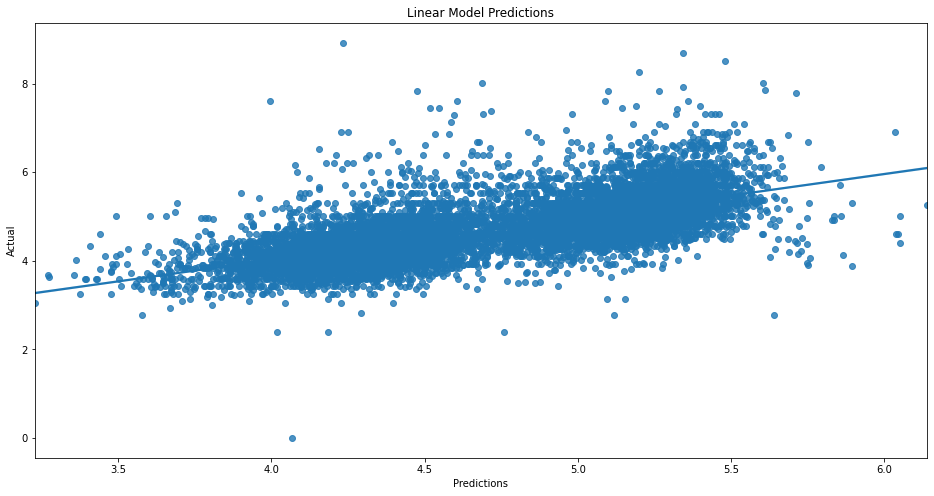

In [507]:
#Linear Model Predictions
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
display()


In [508]:
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

In [509]:
X = df1[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df1['price']

In [510]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [511]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)

In [512]:
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000)

In [513]:
predict = GBoost.predict(X_test)

<BarContainer object of 11 artists>

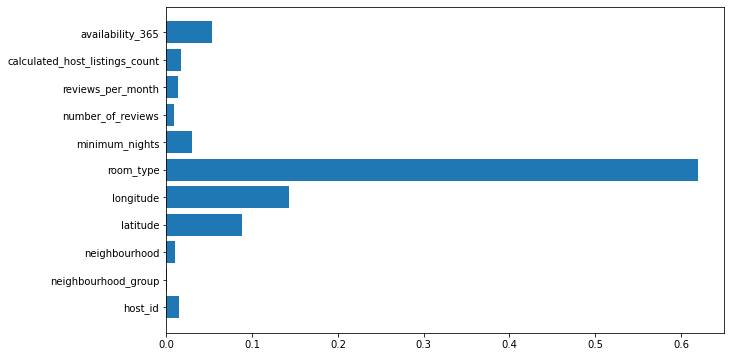

In [514]:
#GBoost.feature_importances_
plt.barh(X.columns.values, GBoost.feature_importances_)

print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,predict))

In [515]:
print('r2 score is:')
r2 = r2_score(y_test,predict)
r2*100

r2 score is:


59.81909839827383

In [516]:
gb_pred_orig = 2**predict 
y_test_orig = 2**y_test

In [517]:
#error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predict.flatten()})
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_orig).flatten(), 'Predicted Values': gb_pred_orig.flatten()})
error_diff1 = error_diff.head(20)


In [518]:
print("Mean absolute error is:")
mean_absolute_error(y_test,predict)

Mean absolute error is:


0.3122873751222057

In [519]:
error_diff1.head()

,Actual Values,Predicted Values
0,63.732680,26.168155
1,30.883404,29.379686
2,38.803494,30.072762
3,27.776454,21.823263
4,22.449888,18.748227


In [520]:
title='Pred vs Actual'
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])
fig.update_layout(barmode='group')
display()
fig.show()

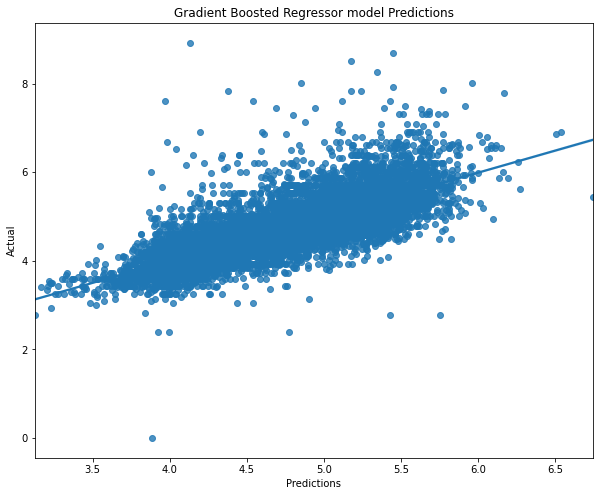

In [521]:
plt.figure(figsize=(10,8))
sns.regplot(predict,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()
display()

In [522]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [523]:
from xgboost import XGBRegressor
import warnings 
warnings.simplefilter(action='ignore')


In [524]:
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [525]:
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,xgb_pred))

Root mean squared error is:


0.4241200225595355

In [526]:
print('r2 score is:')
r2 = r2_score(y_test,xgb_pred)
r2*100

r2 score is:


61.80671984501303

In [527]:
print("Mean absolute error is:")
mean_absolute_error(y_test,xgb_pred)

Mean absolute error is:


0.3036665975010314

In [528]:
xgb_pred_orig = 2**xgb_pred 
y_test_orig = 2**y_test

In [529]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_orig).flatten(), 'Predicted Values': xgb_pred_orig.flatten()})
#error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': xgb_pred.flatten()})
error_diff1 = error_diff.head(20)

In [530]:
error_diff1.head()

,Actual Values,Predicted Values
0,63.732680,27.321270
1,30.883404,29.644995
2,38.803494,30.312424
3,27.776454,20.496761
4,22.449888,18.500448


In [531]:
import plotly.express as px
import plotly.graph_objects as go
title='Pred vs Actual'
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])
fig.update_layout(barmode='group')
display()
fig.show()

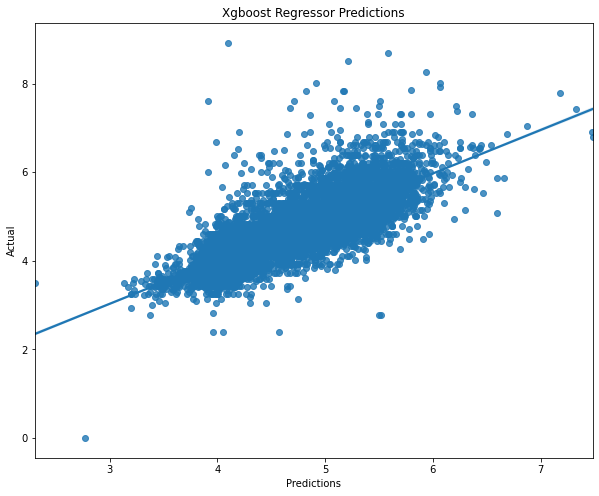

In [532]:
plt.figure(figsize=(10,8))
sns.regplot(xgb_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Xgboost Regressor Predictions")
plt.show()
display()

In [533]:
xgb.feature_importances_

array([0.00751595, 0.0053076 , 0.00985822, 0.01990273, 0.03264956,
       0.8545531 , 0.01615518, 0.01080128, 0.00949982, 0.01601422,
       0.01774237], dtype=float32)

In [534]:
#names = ["model_name","R2","max_error","MAE","MAPE","MSE"]

Predicting Price
LeastSq		

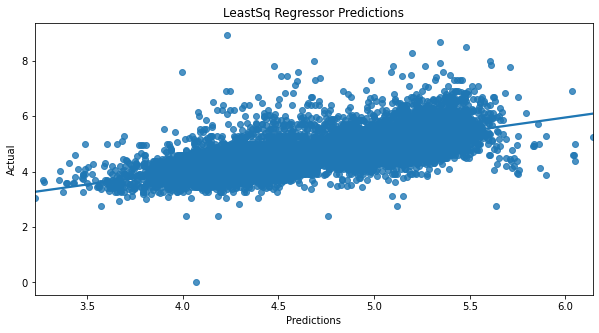

Ridge		

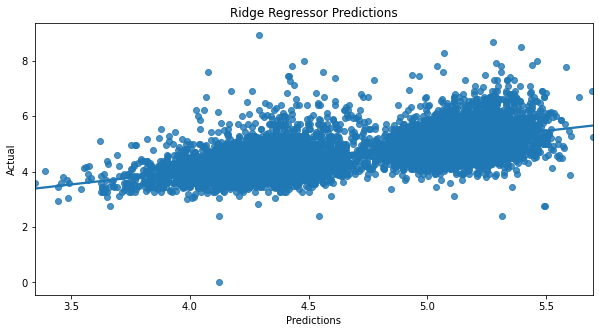

Lasso		

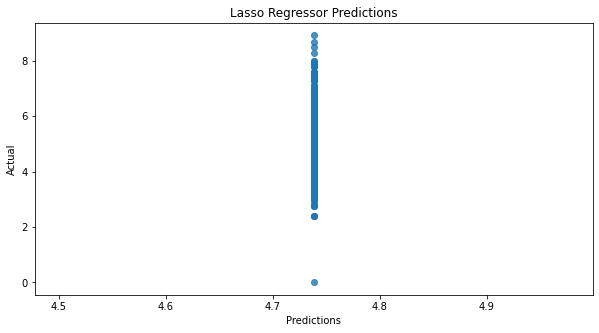

Elastic		

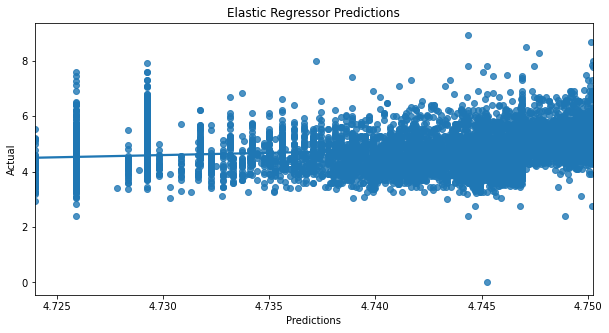

XGBoost		

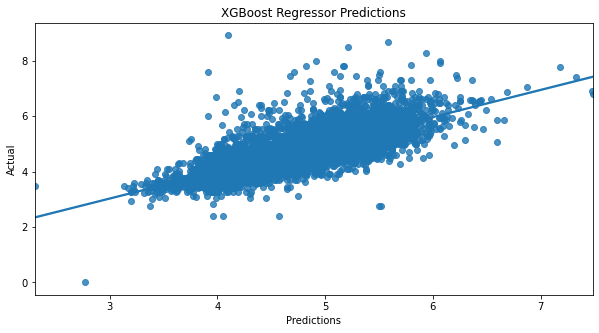

G.Boost		

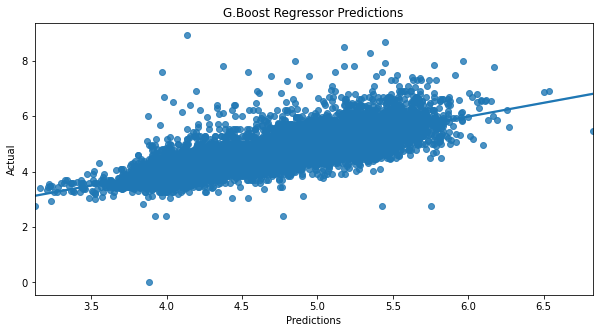

,MAE,MAPE,MSE,R2,max_error,model_name
0,0.359502,1.873290e+12,0.243934,0.482056,4.688803,LeastSq
1,0.383310,1.898115e+12,0.268375,0.430161,4.630931,Ridge
2,0.545706,2.182146e+12,0.471014,-0.000100,4.738256,Lasso
3,0.544089,2.185378e+12,0.468545,0.005144,4.745274,Elastic
4,0.303667,1.274781e+12,0.179878,0.618067,4.825093,XGBoost
5,0.312292,1.788277e+12,0.189264,0.598138,4.790546,G.Boost


In [535]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, max_error, mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from warnings import simplefilter
from sklearn.ensemble import  GradientBoostingRegressor

simplefilter(action='ignore')

models = [LinearRegression, 
          Ridge, 
          Lasso, 
          ElasticNet,
          XGBRegressor, 
          GradientBoostingRegressor
         ]
names = ['LeastSq', 
         'Ridge', 
         'Lasso', 
         'Elastic', 
         'XGBoost',
         'G.Boost'
        ]

eval_names = [
    "R2",
    'max_err',
    "MAE",
    "MAPE",
    "\t\tMSE"
]

results_df = pd.DataFrame() #Initialize to capture results

print("Predicting Price")
#print("\t\t{}\t{}\t{}\t{}\t{}".format(*eval_names))
for i, name in enumerate(names):

    print(name, end="\t\t")

    # TODO 3 
    init_params = {}
    if name == names[1]:
        init_params['alpha'] = 10.5
    if name == names[2]:
        init_params['alpha'] = 0.5
    elif name == names[3]:
        init_params['alpha'] = 10.5
        init_params['l1_ratio'] = 0.01
    elif name == names[4]:
        init_params['n_estimators'] = 310
        init_params['learning_rate'] = 0.1
        init_params['objective'] = 'reg:squarederror'
    elif name == names[5]:
        init_params['n_estimators'] = 3000
        init_params['learning_rate'] = 0.01        

    model = Pipeline([#('scaler', StandardScaler()),
                       ('regr', models[i](**init_params))])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10,5))
    sns.regplot(y_pred,y_test)
    plt.xlabel('Predictions')
    plt.ylabel('Actual')
    plt.title(name + " Regressor Predictions")
    plt.show()

    ##### evaluate

#     results = [
#         r2_score(y_test, y_pred),
#         max_error(y_test, y_pred),
#         mean_absolute_error(y_test, y_pred),
#         mean_absolute_percentage_error(y_test, y_pred),
#         mean_squared_error(y_test, y_pred)
#     ]
    
    res_dict = {'model_name':name,
                'R2':r2_score(y_test, y_pred),
                'max_error':max_error(y_test, y_pred),
                'MAE':mean_absolute_error(y_test, y_pred),
                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                'MSE':mean_squared_error(y_test, y_pred)}
    
    results_df = results_df.append(res_dict,ignore_index = True)
    
    # print out the metrics
    #print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(*results))
    
results_df

In [536]:
results

[0.6180671984501303,
 4.825092935462557,
 0.3036665975010314,
 1274780902658.603,
 0.17987779353590092]

In [537]:
print (results_df)

        MAE          MAPE       MSE        R2  max_error model_name
0  0.359502  1.873290e+12  0.243934  0.482056   4.688803    LeastSq
1  0.383310  1.898115e+12  0.268375  0.430161   4.630931      Ridge
2  0.545706  2.182146e+12  0.471014 -0.000100   4.738256      Lasso
3  0.544089  2.185378e+12  0.468545  0.005144   4.745274    Elastic
4  0.303667  1.274781e+12  0.179878  0.618067   4.825093    XGBoost
5  0.312292  1.788277e+12  0.189264  0.598138   4.790546    G.Boost


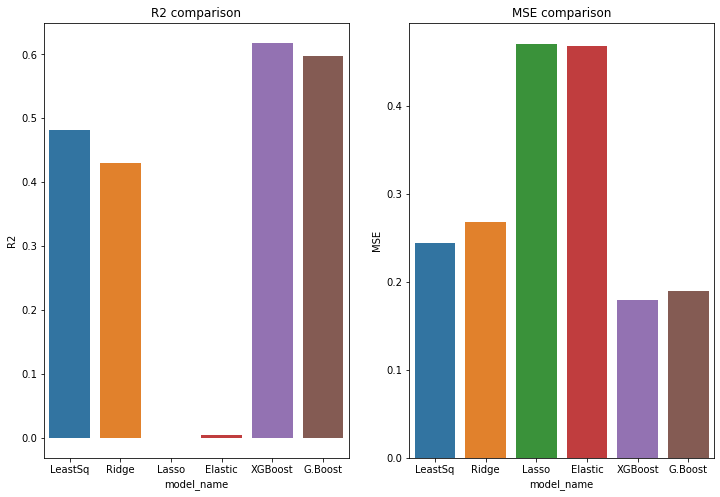

In [538]:
#plt.figure(figsize=(10,10))
plt.rcParams['figure.figsize'] = [12, 8]
fig, axes = plt.subplots(1,2)
ax = sns.barplot (x="model_name",y="R2",data=results_df,ax=axes[0]).set_title("R2 comparison")
ax = sns.barplot (x="model_name",y="MSE",data=results_df,ax=axes[1]).set_title("MSE comparison")

<BarContainer object of 11 artists>

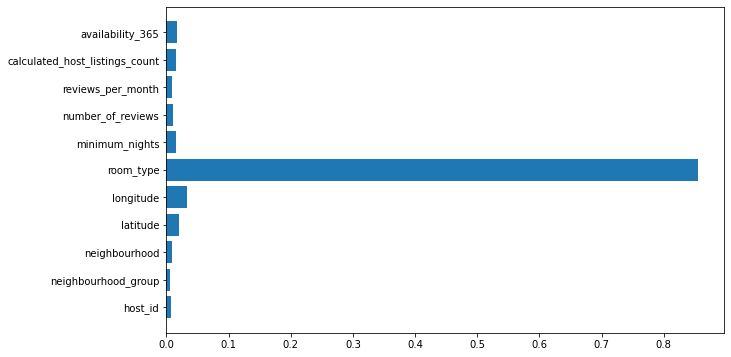

In [539]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.barh(X.columns.values, xgb.feature_importances_)